In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report 
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Pull in X, Y data
x = pd.read_csv('PreprocX.csv', header=None)
#x.drop('Unnamed: 0', axis=1, inplace=True)

y = pd.read_csv('PreprocY.csv', header=None)
y.drop(0, axis=1, inplace=True)

x_mini = pd.read_csv('PreprocXmini.csv', header=None)
#x_mini.drop('Unnamed: 0', axis=1, inplace=True)

y_mini = pd.read_csv('PreprocYmini.csv', header=None)
y_mini.drop(0, axis=1, inplace=True)

In [3]:
#Check shapes
xshape = x.shape
yshape = y.shape
xmshape = x_mini.shape
ymshape = y_mini.shape
print('DF:    |  Shape:\nx      | {}\ny      | {}\nx_mini | {}\ny_mini | {}'.format(xshape,yshape,xmshape,ymshape))

DF:    |  Shape:
x      | (60448, 37)
y      | (60448, 1)
x_mini | (6045, 37)
y_mini | (6045, 1)


In [4]:
#Create 20% test, 80% train split for param analysis
from sklearn import model_selection

XM_train,XM_test,YM_train,YM_test = model_selection.train_test_split(x_mini,y_mini,
                                                                       test_size = 0.2,
                                                                       random_state = 42)


In [5]:
#Function for SVM param analysis
def SVM_Param_Search(x_train,y_train,x_test,y_test,C_upper,dg_upper):
    SVM_score = {}
    SVM_scores = {}
    count = 0
    #initialize plots
    plt.figure(figsize = (10,10))
    sqr = np.ceil(dg_upper**.5)
    print('                test score     |    train score    |    abs score diff')
    for dg in range(1,dg_upper+1):
        print('Degree: {}'.format(dg))
        for c in range(0,(C_upper+1),10):
            if c==0:
                c=1
            svm_model = SVC(C=c, kernel='poly', degree=dg,
                            coef0=1, random_state = 42,
                            max_iter=40000)
            svm_model.fit(x_train,y_train)
            key = 'degree {}:C {}'.format(dg,c)
            test_score = svm_model.score(x_test,y_test)
            train_score = svm_model.score(x_train,y_train)
            score_diff = np.abs(train_score-test_score)
            SVM_score[c] = [test_score, train_score, score_diff]
            print('C={} score: {}'.format(c,SVM_score[c]))
        #plot scores
        Cx=[]
        Cy=[]
        for key in SVM_score.keys():
            Cx.append(key)
            Cy.append(SVM_score[key])
        plt.subplot(sqr, sqr, count+1)
        plt.plot(Cx,Cy)
        plt.title('SVM with degree: {}'.format(dg))
        plt.xlabel('C value')
        plt.ylabel('model score')
        plt.tight_layout()
        plt.legend(labels=['train score', 'test score', '|score diff|'])
        count = count + 1

                test score     |    train score    |    abs score diff
Degree: 1
C=1 score: [0.8221670802315963, 0.8141025641025641, 0.008064516129032251]
C=10 score: [0.837055417700579, 0.8219602977667494, 0.015095119933829615]
C=20 score: [0.8362282878411911, 0.8240281224152192, 0.01220016542597191]
C=30 score: [0.8378825475599669, 0.8236145574855253, 0.014267990074441683]
C=40 score: [0.8362282878411911, 0.8227874276261373, 0.013440860215053752]
C=50 score: [0.8362282878411911, 0.8223738626964433, 0.013854425144747773]
C=60 score: [0.8362282878411911, 0.8192721257237386, 0.016956162117452434]
C=70 score: [0.8354011579818031, 0.8223738626964433, 0.013027295285359841]
C=80 score: [0.8378825475599669, 0.8227874276261373, 0.015095119933829615]
C=90 score: [0.8337468982630273, 0.8219602977667494, 0.011786600496277888]
C=100 score: [0.8403639371381307, 0.8248552522746071, 0.015508684863523636]
C=110 score: [0.826302729528536, 0.815136476426799, 0.011166253101737023]
C=120 score: [0.836228

C=30 score: [0.9007444168734491, 0.9071546732837056, 0.0064102564102564985]
C=40 score: [0.8982630272952854, 0.9075682382133995, 0.009305210918114093]
C=50 score: [0.9057071960297767, 0.9181141439205955, 0.012406947890818865]
C=60 score: [0.9007444168734491, 0.9145988420181969, 0.013854425144747773]
C=70 score: [0.8610421836228288, 0.8691066997518611, 0.008064516129032251]
C=80 score: [0.9048800661703887, 0.9224565756823822, 0.01757650951199341]
C=90 score: [0.9048800661703887, 0.9203887510339124, 0.015508684863523636]
C=100 score: [0.9048800661703887, 0.9224565756823822, 0.01757650951199341]
C=110 score: [0.9073614557485525, 0.9228701406120761, 0.015508684863523525]
C=120 score: [0.8751033912324235, 0.8825475599669148, 0.007444168734491274]
C=130 score: [0.8668320926385442, 0.8808933002481389, 0.014061207609594728]
C=140 score: [0.8974358974358975, 0.9185277088502894, 0.02109181141439198]
C=150 score: [0.8792390405293631, 0.8889578163771712, 0.009718775847808114]
C=160 score: [0.89164

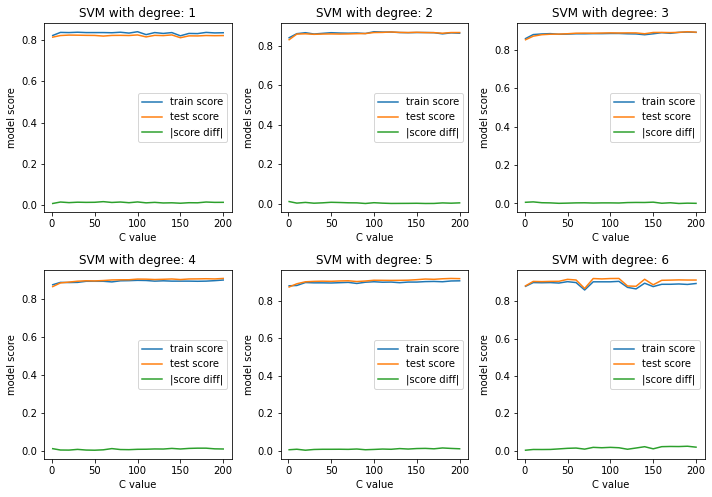

In [6]:
SVM_Param_Search(x_train = XM_train, y_train = YM_train,
                 x_test = XM_test, y_test = YM_test,
                 C_upper = 200, dg_upper = 6)

In [7]:
#Sensitivity Analysis
def SVM_Sensitivity(x,y,C,degree):
    sen_x = []
    sen_y = []
    
    for test_ratio in range(10,100,5):
        X_train,X_test,y_train,y_test = model_selection.train_test_split(x, y,
                                                        test_size=test_ratio/100, 
                                                        random_state=42)
        svm_model = SVC(kernel='poly', degree=degree, coef0=1, C=C, max_iter=40000)
        svm_model.fit(X_train,y_train)
        sen_x.append(test_ratio)
        sen_y.append(svm_model.score(X_test,y_test))
        print('{}% test | score: {}'.format(test_ratio,sen_y[-1]))
    plt.plot(sen_x,sen_y)
    plt.xlabel('Test %')
    plt.ylabel('Model Score')
    plt.title('Sensitivity Analysis\n(C: {}, degree: {})'.format(C,degree))

10% test | score: 0.8876033057851239
15% test | score: 0.8974641675854466
20% test | score: 0.8924731182795699
25% test | score: 0.8928571428571429
30% test | score: 0.8919514884233738
35% test | score: 0.8875236294896031
40% test | score: 0.8854425144747725
45% test | score: 0.8779860345461228
50% test | score: 0.8795898114455839
55% test | score: 0.877593984962406
60% test | score: 0.8756548111386822
65% test | score: 0.8597964376590331
70% test | score: 0.8445179584120983
75% test | score: 0.8584031760035289
80% test | score: 0.836848635235732
85% test | score: 0.8182525783226309
90% test | score: 0.8169454144458739
95% test | score: 0.7793835974229497


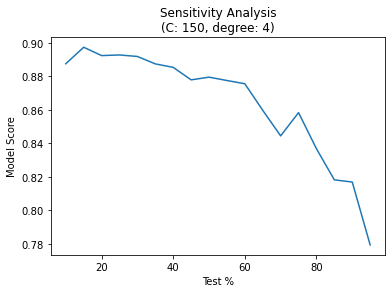

In [8]:
#Set Params
C = 150
degree = 4
test_ratio = .20

#Do sensitivity analysis
SVM_Sensitivity(x=x_mini, y=y_mini, C=C, degree=4)

In [9]:
#Train model with full dataset
#Set Params
C = C
degree = degree
test_ratio = test_ratio

######################################################################
########################## Mini Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x_mini, y_mini,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
svm_model_mini = SVC(kernel = 'poly', degree = degree, coef0 = 1, C=C,
                     max_iter = 40000)
svm_model_mini.fit(X_train, Y_train)

######################################################################
########################## Full Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x, y,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
svm_model_full = SVC(kernel = 'poly', degree = degree, coef0 = 1, C=C,
                     max_iter = 40000)
svm_model_full.fit(X_train, Y_train)


SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=40000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
#Compare full and mini models
#Score models
full_score = svm_model_full.score(X_test, Y_test)
mini_score = svm_model_mini.score(X_test, Y_test)

print('full model score: {}\nmini model score: {}'.format(full_score, mini_score))

full model score: 0.8095119933829611
mini model score: 0.8810587262200166


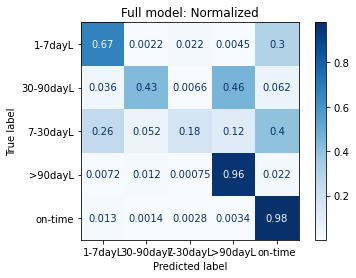

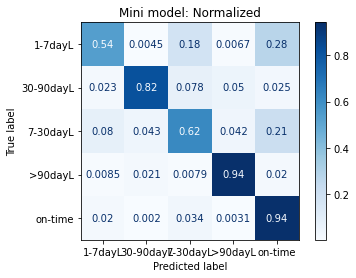

In [11]:
#Plot confusion matricies
#Full
full_confusion = plot_confusion_matrix(svm_model_full, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
full_confusion.ax_.set_title('Full model: Normalized')
plt.show()

#Mini
mini_confusion = plot_confusion_matrix(svm_model_mini, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
mini_confusion.ax_.set_title('Mini model: Normalized')
plt.show()

In [12]:
# #pickle models for later prediction
# models = [svm_model_full, svm_model_mini]
# names = ['SVM_full', 'SVM_mini']

# for i in range(len(models)):
#     with open(names[i] + '.pickle', 'wb') as f:
#         pickle.dump(models[i], f)